In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.datasets  import cifar10
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [ ]:
adam = Adam(lr = 0.1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

     8192/170498071 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
from collections import Counter
Counter(y_train.ravel())

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

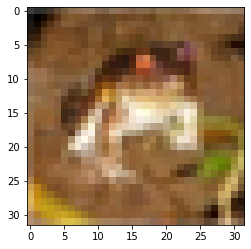

In [ ]:
plt.imshow(X_train[0])

In [ ]:
model = Sequential()
model.add(Conv2D(6, 5, activation = 'relu', input_shape = (32, 32, 3) ))
model.add(MaxPool2D(2, strides = (2, 2)))
model.add(Conv2D(16, 5, activation = 'relu'))
model.add(MaxPool2D(2, strides = (2, 2)))
model.add(Conv2D(120, 5, activation = 'relu'))
model.add(Flatten())
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.build()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=25,batch_size=16)

Epoch 1/25
1563/1563 [==============================] - 30s 18ms/step - loss: 1.8892 - accuracy: 0.3175 - val_loss: 1.7455 - val_accuracy: 0.3748
Epoch 2/25
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5738 - accuracy: 0.4296 - val_loss: 1.5368 - val_accuracy: 0.4555
Epoch 3/25
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4462 - accuracy: 0.4856 - val_loss: 1.4827 - val_accuracy: 0.4772
Epoch 4/25
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3518 - accuracy: 0.5193 - val_loss: 1.3529 - val_accuracy: 0.5226
Epoch 5/25
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2789 - accuracy: 0.5506 - val_loss: 1.4829 - val_accuracy: 0.5093
Epoch 6/25
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2158 - accuracy: 0.5714 - val_loss: 1.3302 - val_accuracy: 0.5379
Epoch 7/25
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1744 - accuracy: 0.5880 - val_loss: 1.2898 -

In [ ]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print('LeNet Model Test Accuracy: ', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.6674 - accuracy: 0.5471
LeNet Model Test Accuracy:  0.5471000075340271
